# Import

In [1]:
import os

import numpy as np
import pandas as pd
import random

import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from llm_scores_analysis import * ### all important analysis functions stored here

# Import Data

In [2]:
current_dir = os.getcwd()
if current_dir.endswith("notebooks"):
    prefix = "../"
else:
    prefix = "./"

base_dir = os.path.join(prefix, "summeval-data")
print(base_dir)

full_df = pd.read_json(os.path.join(base_dir, "summeval_processed_full.jsonl"), lines=True)


../summeval-data


In [3]:
N_SUBSET = 300

selected_df = full_df.sample(n=N_SUBSET, random_state=42)
print(len(selected_df))

selected_indices = selected_df.index
print(selected_indices)

300
Index([ 526,  354,  168,  135,  937, 1544, 1253,  237,  478,  650,
       ...
        163, 1296,  266, 1005,  873,  692, 1450, 1263,  192,  548],
      dtype='int64', length=300)


In [4]:
models = [
    "gpt-4o-mini-2024-07-18",
    "gpt-3.5-turbo",
    "mistral-small-latest",
    "mistral-medium-latest",
    "claude-3-5-haiku-20241022"
]

In [5]:
output_dir = "../results/adv"  ### Change as needed
score_tables = {}
explain_tables = {}

for model in models:

    score_path = os.path.join(output_dir, f"score_table_{model}.npy")
    explain_path = os.path.join(output_dir, f"explain_table_{model}.npy")

    score_tables[model] = np.load(score_path, allow_pickle=True)
    explain_tables[model] = np.load(explain_path, allow_pickle=True)

    print(f"{model} → Scores shape: {score_tables[model].shape}, Explains shape: {explain_tables[model].shape}")
    
    if np.all(score_tables[model] != -1) and score_tables[model].size > 0 and explain_tables[model].size > 0:
        print(f"[OK]: Scores & explanations loaded successfully.\n")
    else:
        print(f"[WARN]: Missing or invalid data.\n")

gpt-4o-mini-2024-07-18 → Scores shape: (300, 7, 1), Explains shape: (300, 7, 1)
[OK]: Scores & explanations loaded successfully.

gpt-3.5-turbo → Scores shape: (300, 7, 1), Explains shape: (300, 7, 1)
[OK]: Scores & explanations loaded successfully.

mistral-small-latest → Scores shape: (300, 7, 1), Explains shape: (300, 7, 1)
[OK]: Scores & explanations loaded successfully.

mistral-medium-latest → Scores shape: (300, 7, 1), Explains shape: (300, 7, 1)
[OK]: Scores & explanations loaded successfully.

claude-3-5-haiku-20241022 → Scores shape: (300, 7, 1), Explains shape: (300, 7, 1)
[OK]: Scores & explanations loaded successfully.



In [6]:
properties_og = ["fluency", "relevance", "coherence", "consistency"]

assertion_dictionary_og = {
    'fluency': {
        'C1-A1': 'Fluency measures the quality of individual sentences, are they well-written and grammatically correct. Consider the quality of individual sentences.',
        'C1-A2': 'Each sentence is free from grammatical errors and awkward phrasing.',
        'C1-A3': 'Contains sentences that are incomplete or lack a clear subject-verb-object structure',
        # 'C1-A3': 'Sentences contains grammatical errors and awkward phrasing.', ### negation example
    },
    'relevance': {
        'C2-A1': 'Relevance measures how well the summary captrues the key points of the article. Consider whether all and only the important aspects are contained in the summary.',
        'C2-A2': 'Contains no irrelevant or extraneous information unrelated to the article\'s main points',
        'C2-A3': 'Includes all context necessary for understanding key events or claims',
        'C2-A4': 'Includes absolutely all information that could reasonably be necessary to evaluate events or claims, even if not central to the article’s key points.',
        'C2-A5': 'Includes at least some information needed to understand key events or claims.',
    },
    'coherence': {
        'C3-A1': 'Coherence measures the quality of all sentences collectively, to the fit togheter and soound naturally. Consider the quality of the summary as a whole.',
        'C3-A2': 'Sentences in the summary logically progress from one to another without introducing conflicting or unrelated information.',
        'C3-A3': 'Maintains logical progression without conflicting or contradictory information',
    },
    'consistency': {
        'C4-A1': "Consistency measures whether the facts in the summary are consistent with the facts in the original article. COnsider whether the summary does reproduce all facts accurately and does not make up untrue information.",
        'C4-A2': 'The summary includes no fabricated details or misrepresented facts compared to the original article.',
        'C4-A3': 'Summary contains only verifiable facts directly present in the original article.',
    }
}

In [7]:
properties_advanced = ["ambiguity", "complexity", "language"]

assertion_dictionary_advanced = {
    'ambiguity': {
        'C1-A1': 'The summary demonstrates appropriate level of detail for the intended reader.',
        'C1-A2': 'The summary includes the main claim and supporting evidence from each paragraph of the source article.',
    },
    'complexity': {
        'C2-A1': 'The summary accurately captures the article\'s key points, maintains neutral tone throughout, demonstrates coherent organization between sentences, and avoids both redundancy and important omissions while preserving the original meaning.',
        'C2-A2': 'The summary accurately captures the article\'s key points.',
        'C2-A3': 'The summary maintains neutral tone throughout.',  
    },
    'language': {
        'C3-A1': 'The summary demonstrates high extractive fidelity while maintaining abstractive coherence across semantic boundaries.',
        'C3-A2': 'The summary uses words from the original article while connecting ideas in a logical way.',
    },
}

In [8]:
### Change as needed

properties = properties_advanced
assertion_dictionary = assertion_dictionary_advanced

# Analysis - Singular Model Level


=== mistral-medium-latest ===
avg_rating_per_assertion:
 [0.75666667 0.57666667 0.43       0.80666667 0.95       0.81666667
 0.9       ]


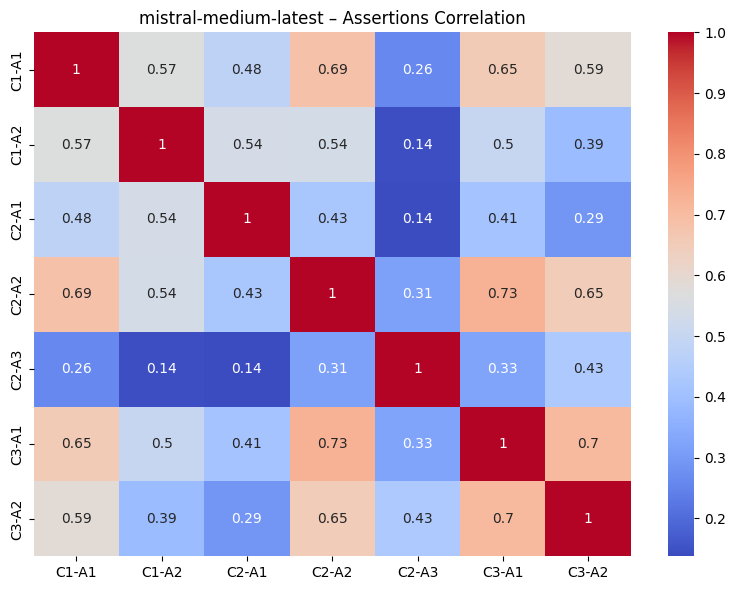

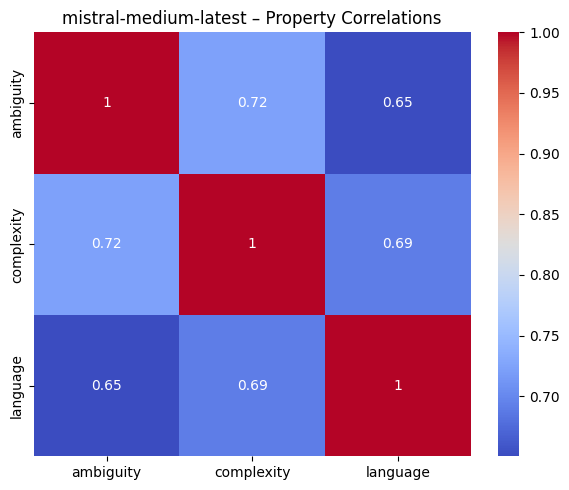

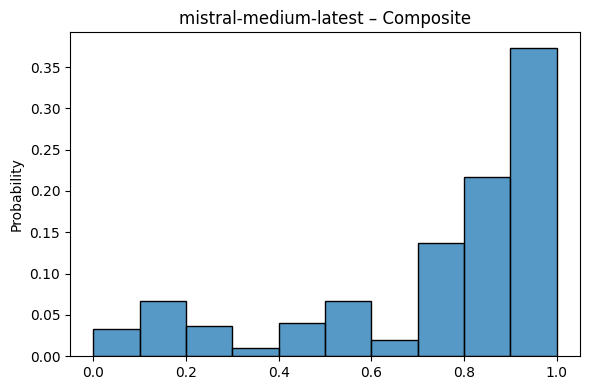

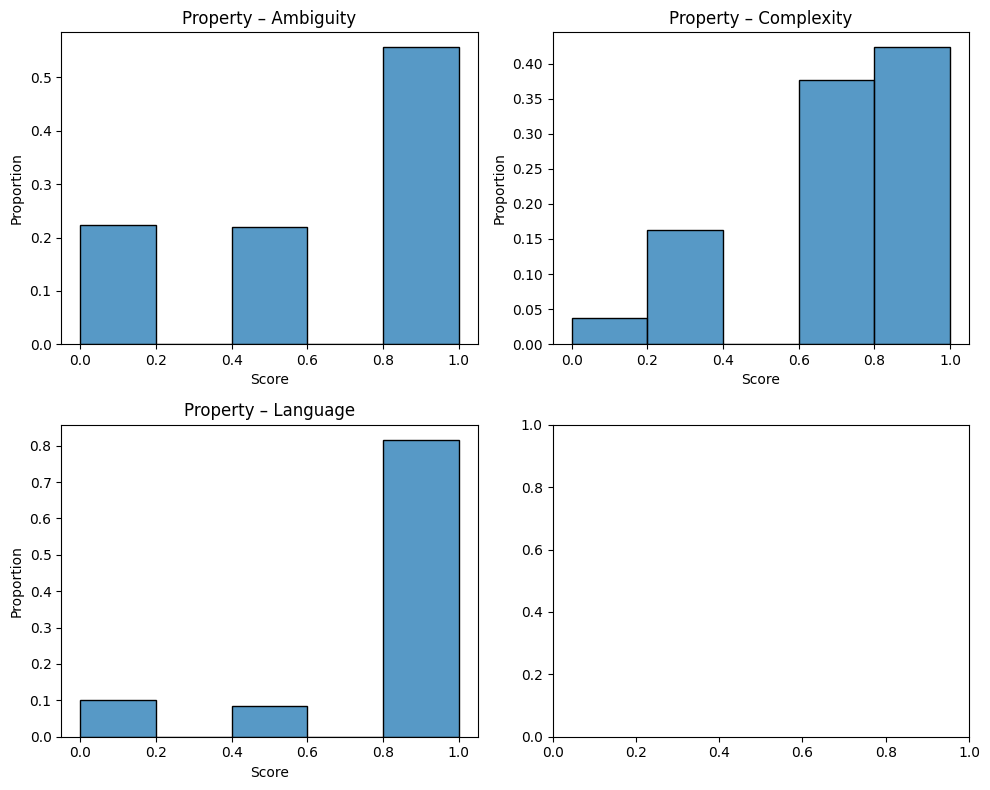

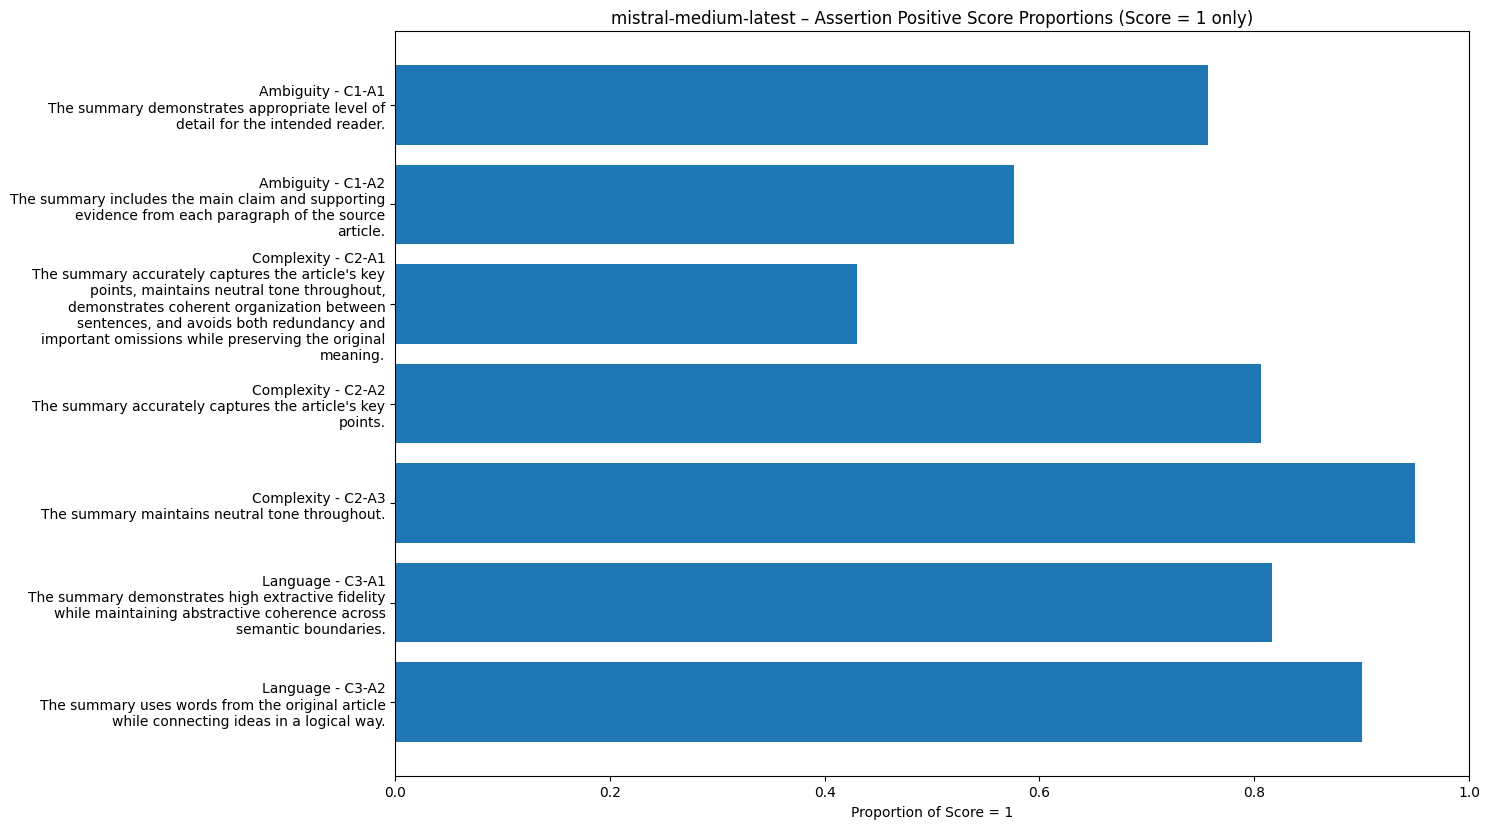

In [9]:
model_to_check = "mistral-medium-latest"  # Change as needed, refer to variable models
scores = score_tables[model_to_check]
explains = explain_tables.get(model_to_check)

report = analyze_single_model(
    scores=scores,
    assertion_dictionary=assertion_dictionary,
    properties=properties,
    explains=explains,
    model_name=model_to_check,
    plot=True
)

In [10]:
single_reports = {}

for model_str, scores in score_tables.items():
    explains = explain_tables.get(model_str)
    single_reports[model_str] = analyze_single_model(
        scores=scores,
        assertion_dictionary=assertion_dictionary,
        properties=properties,
        explains=explains,
        model_name=model_str,
        plot=False
    )


=== gpt-4o-mini-2024-07-18 ===
avg_rating_per_assertion:
 [0.31       0.04       0.06666667 0.49666667 0.69666667 0.57
 0.6       ]

=== gpt-3.5-turbo ===
avg_rating_per_assertion:
 [0.56       0.54       0.50666667 0.71333333 0.83333333 0.63
 0.61666667]

=== mistral-small-latest ===
avg_rating_per_assertion:
 [0.77       0.56666667 0.56666667 0.79       0.86       0.76
 0.83666667]

=== mistral-medium-latest ===
avg_rating_per_assertion:
 [0.75666667 0.57666667 0.43       0.80666667 0.95       0.81666667
 0.9       ]

=== claude-3-5-haiku-20241022 ===
avg_rating_per_assertion:
 [0.47666667 0.41       0.35       0.72       0.75333333 0.73333333
 0.86666667]


# Analysis - Across Models


=== Across Models ===
avg_rating_per_assertion:
 [0.57466667 0.42666667 0.384      0.70533333 0.81866667 0.702
 0.764     ]


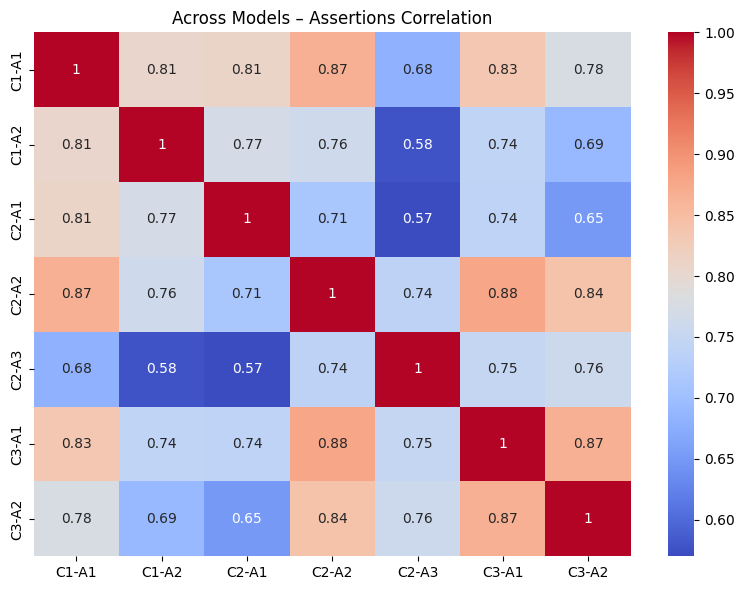

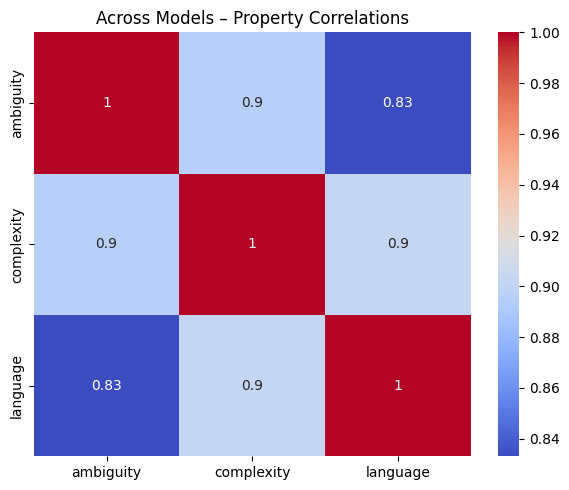

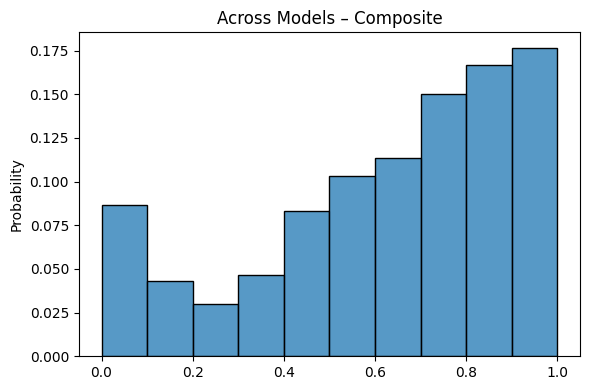

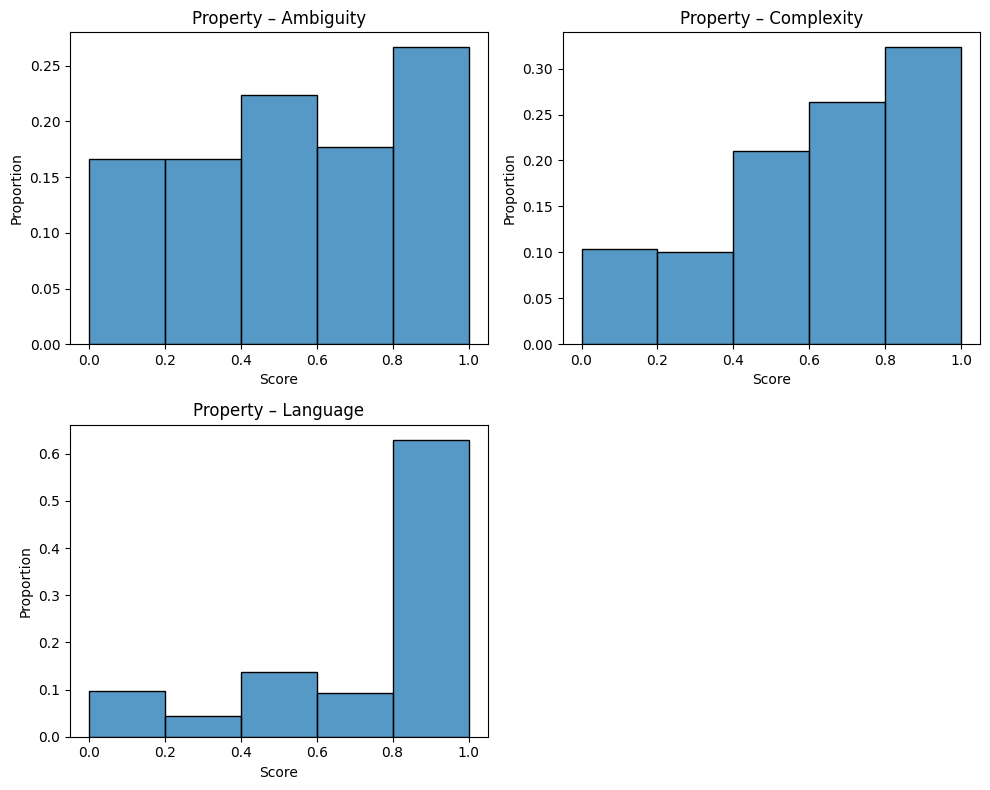

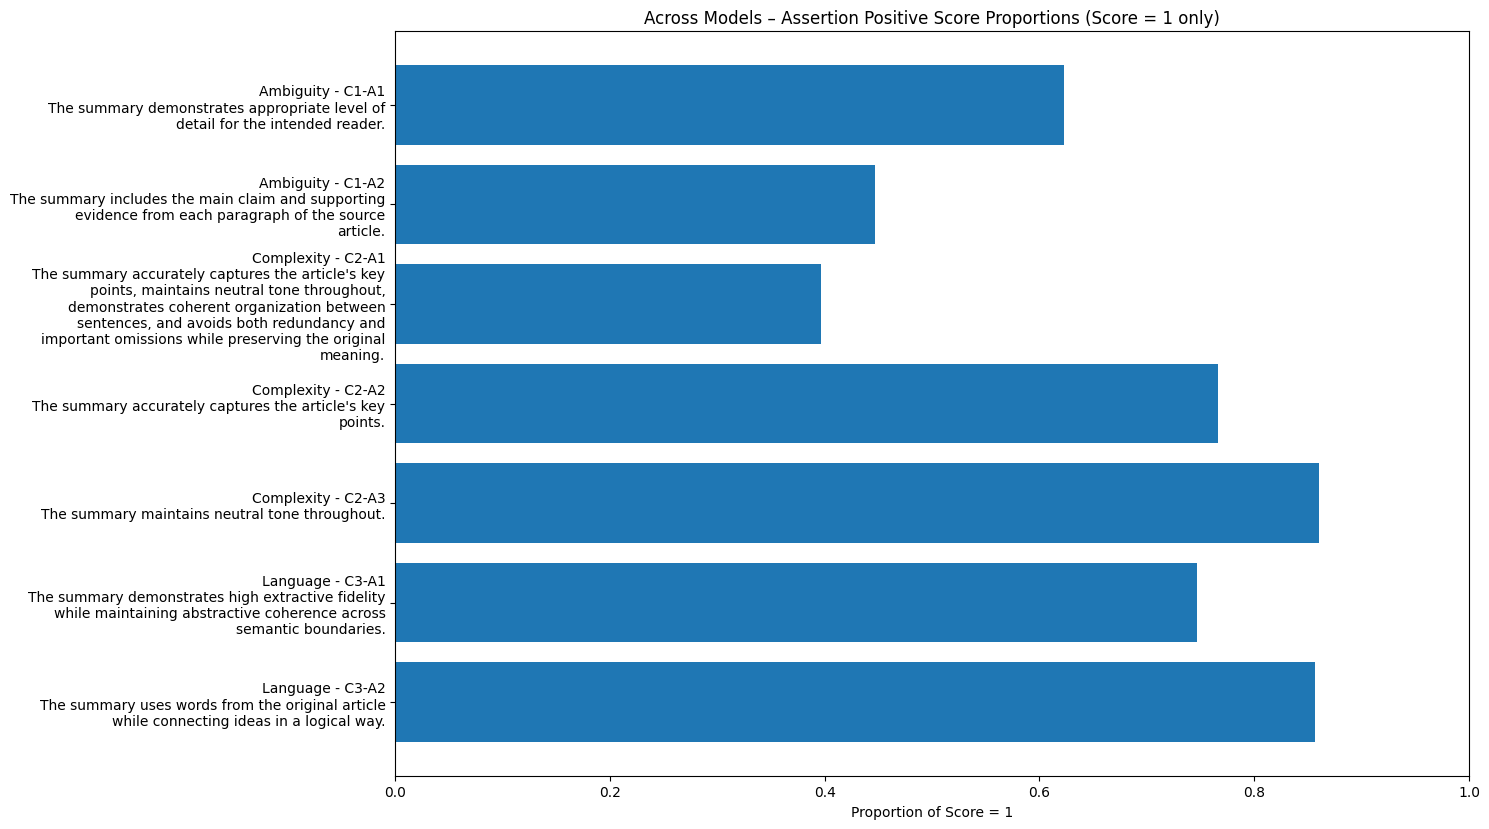

variance_per_assertion:
 [0.13573333 0.15306667 0.1288     0.0944     0.07733333 0.09333333
 0.08933333] (7,)


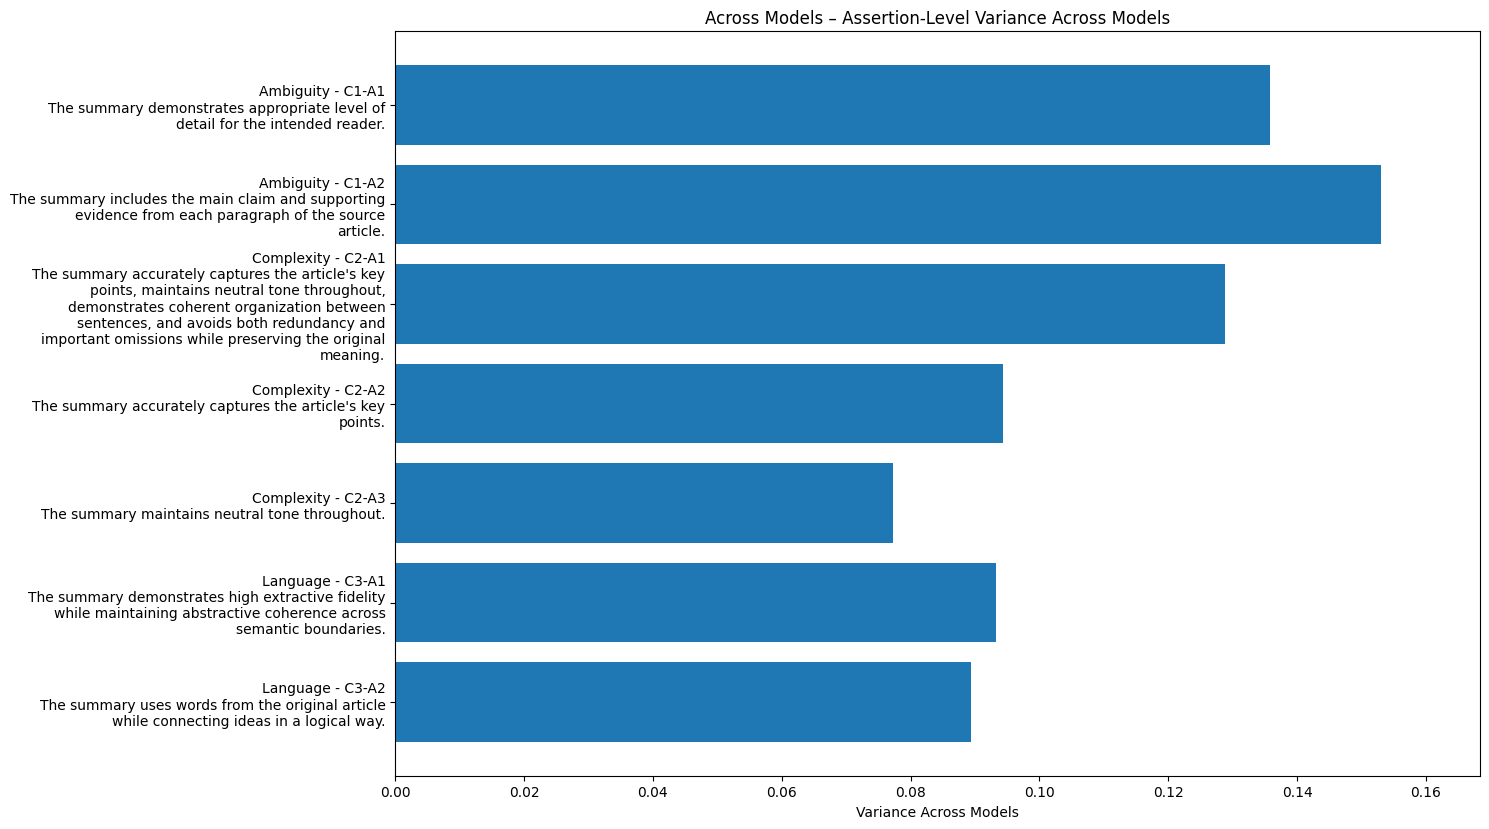

avg_scores_per_assertion shape: (5, 7)


In [11]:
cross_report = analyze_across_models(
    score_tables=score_tables,
    explain_tables=explain_tables,
    properties=properties,
    assertion_dictionary=assertion_dictionary
)